## **Cloning dataset from** [bitbucket](https://bitbucket.org/jadslim/german-traffic-signs/src/master/)

In [1]:
! git clone https://bitbucket.org/jadslim/german-traffic-signs.git

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


### **Importing pickle library** 

In [2]:
import pickle

In [3]:
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# loading train data
with open('german-traffic-signs/train.p', 'rb') as data:
  train_data = pickle.load(data)


# loading validation data
with open('german-traffic-signs/valid.p', 'rb') as data:
  val_data = pickle.load(data)


# loading test data
with open('german-traffic-signs/test.p', 'rb') as data:
  test_data = pickle.load(data)

In [5]:
print(f'Type of train data is: {type(train_data)}')
print(f'Type of validation data is: {type(val_data)}')
print(f'Type of test data is: {type(test_data)}')


Type of train data is: <class 'dict'>
Type of validation data is: <class 'dict'>
Type of test data is: <class 'dict'>


In [6]:
train_data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [7]:
val_data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [8]:
test_data.keys()

dict_keys(['sizes', 'coords', 'features', 'labels'])

In [9]:
# training data and there labels
train_X , train_y = train_data['features'] , train_data['labels']   

# validation data and there labels
val_X , val_y = val_data['features'] , val_data['labels']

# test data and there labels
test_X , test_y = test_data['features'] , test_data['labels']

In [10]:
print(f'Shape of training data is: {train_X.shape}')
print(f'Shape of validation data is: {val_X.shape}')
print(f'Shape of test data is: {test_X.shape}')

Shape of training data is: (34799, 32, 32, 3)
Shape of validation data is: (4410, 32, 32, 3)
Shape of test data is: (12630, 32, 32, 3)


In [11]:
print(f'Shape of training labels is: {train_y.shape}')
print(f'Shape of validation labels is: {val_y.shape}')
print(f'Shape of test labels is: {test_y.shape}')

Shape of training labels is: (34799,)
Shape of validation labels is: (4410,)
Shape of test labels is: (12630,)


In [12]:
print(f'Maximum label from training data is: {train_y.max()}')
print(f'Minimum label from training data is: {train_y.min()}\n')

print(f'Maximum label from validation data is: {val_y.max()}')
print(f'Minimum label from validation data is: {val_y.min()}\n')

print(f'Maximum label from test data is: {test_y.max()}')
print(f'Minimum label from test data is: {test_y.min()}')

Maximum label from training data is: 42
Minimum label from training data is: 0

Maximum label from validation data is: 42
Minimum label from validation data is: 0

Maximum label from test data is: 42
Minimum label from test data is: 0


### **Checking balance of train data**

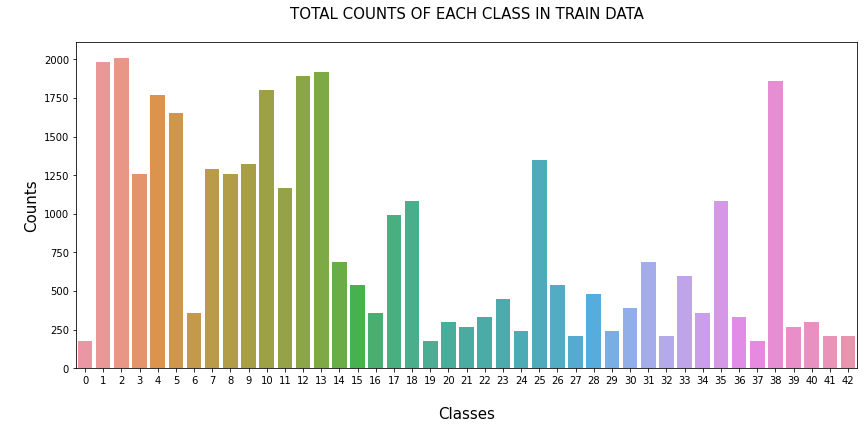

In [13]:
plt.figure(figsize = (14,6))
sbn.countplot(x = train_y)
plt.title("TOTAL COUNTS OF EACH CLASS IN TRAIN DATA\n", size=15)
plt.xlabel("\nClasses", fontsize=15)
plt.ylabel("\nCounts", fontsize=15)
plt.show()

### **Displaying whether the `validation data` is balanced or not**

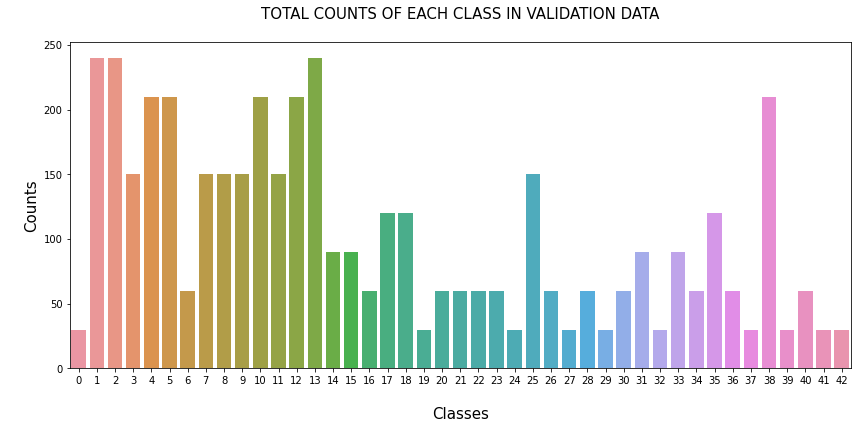

In [14]:
plt.figure(figsize = (14,6))
sbn.countplot(x = val_y)
plt.title("TOTAL COUNTS OF EACH CLASS IN VALIDATION DATA\n", size=15)
plt.xlabel("\nClasses", fontsize=15)
plt.ylabel("\nCounts", fontsize=15)
plt.show()

### **Displaying whether the `test data` is balanced or not**

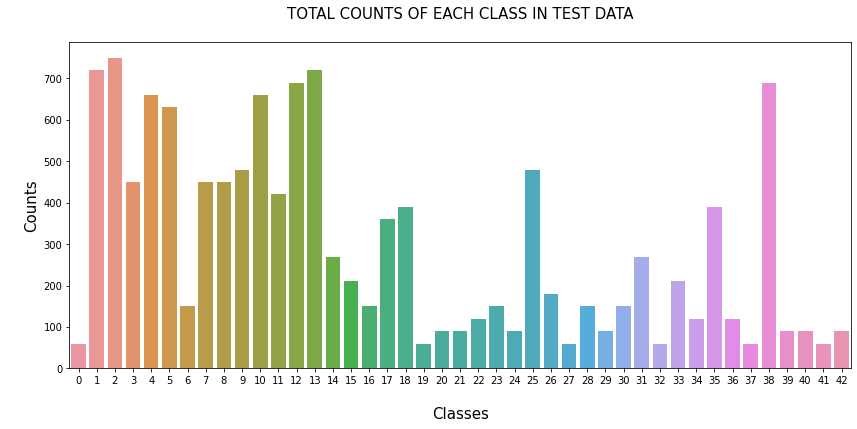

In [15]:
plt.figure(figsize = (14,6))
sbn.countplot(x = test_y)
plt.title("TOTAL COUNTS OF EACH CLASS IN TEST DATA\n", size=15)
plt.xlabel("\nClasses", fontsize=15)
plt.ylabel("\nCounts", fontsize=15)
plt.show()

### **So the train, validation and test data is balanced**

### **Displaying 16 random images from `train_X`**

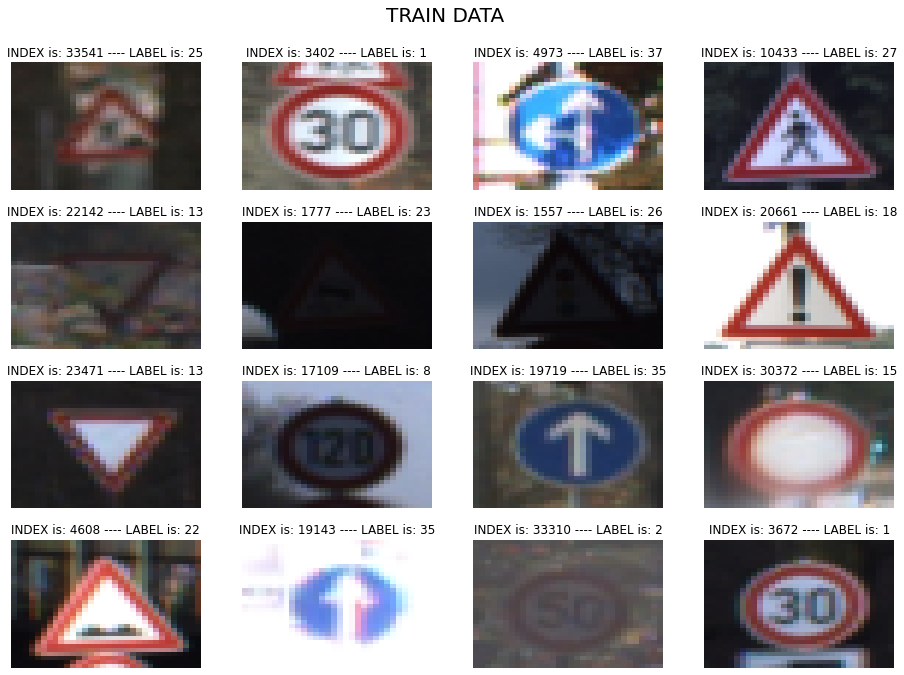

In [16]:
fig, axes = plt.subplots(4,4, figsize=(13,9))
fig.tight_layout()
plt.suptitle("TRAIN DATA\n\n\n\n", size = 20, va = 'center')

for i in range(4):
  for j in range(4):
    rand_num = np.random.randint(0, len(train_X)+1)
    img = train_X[rand_num]      # image at specific index
    label = train_y[rand_num]

    axes[i][j].imshow(img, cmap='gray', aspect='auto')
    axes[i][j].set_title(f"INDEX is: {rand_num} ---- LABEL is: {label}")
    axes[i][j].axis('off')

### **Displaying random images from `validation data`**

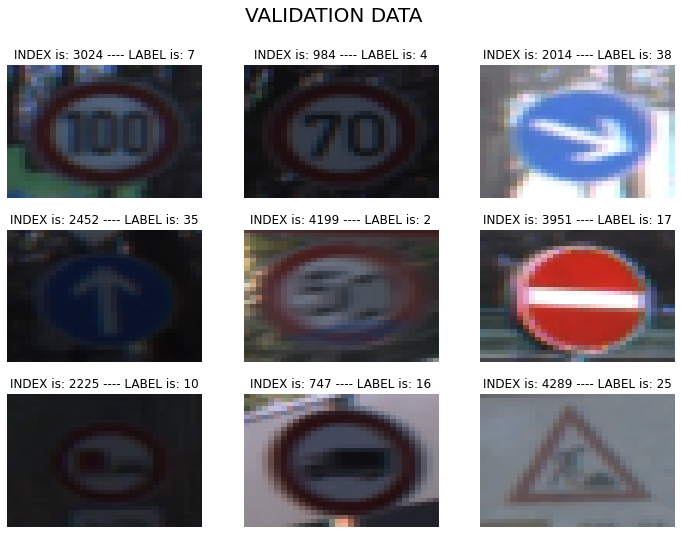

In [17]:
fig, axes = plt.subplots(3,3, figsize=(10,7))
plt.suptitle("VALIDATION DATA\n\n\n\n", size = 20, va = 'center')
fig.tight_layout()

for i in range(3):
  for j in range(3):
    rand_num = np.random.randint(0, len(val_X)+1)
    img = val_X[rand_num]      # image at specific index
    label = val_y[rand_num]

    axes[i][j].imshow(img, cmap='gray', aspect='auto')
    axes[i][j].set_title(f"INDEX is: {rand_num} ---- LABEL is: {label}")
    axes[i][j].axis('off')

### **Displaying random images from `test data`**

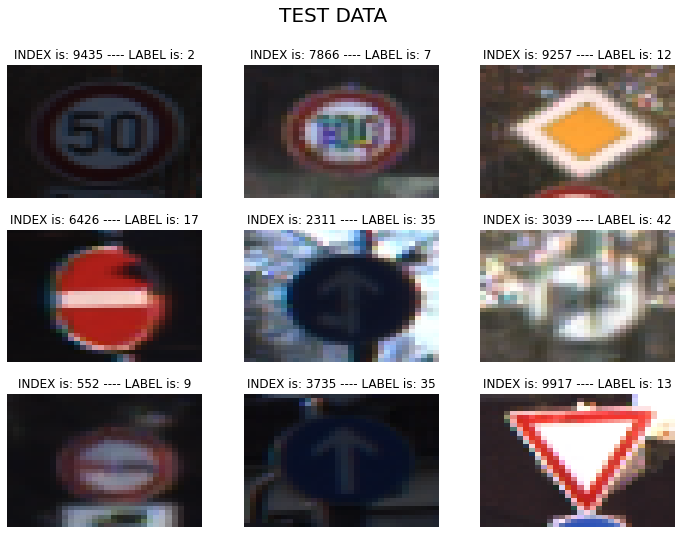

In [18]:
fig, axes = plt.subplots(3,3, figsize=(10,7))
plt.suptitle("TEST DATA\n\n\n\n", size = 20, va = 'center')
fig.tight_layout()

for i in range(3):
  for j in range(3):
    rand_num = np.random.randint(0, len(test_X)+1)
    img = test_X[rand_num]      # image at specific index
    label = test_y[rand_num]

    axes[i][j].imshow(img, cmap='gray', aspect='auto')
    axes[i][j].set_title(f"INDEX is: {rand_num} ---- LABEL is: {label}")
    axes[i][j].axis('off')

### **Data Preprocessing**
#### **Normalization**

**Before Normalization**

In [19]:
train_X.max()       # maximum pixel value in train data

255

In [20]:
np.min(train_X)      # minimum pixel value in train data   

0

---

In [21]:
val_X.max()         # minimum pixel value in validation data

255

In [22]:
val_X.min()        # minimum pixel value in validation data

0

---

In [23]:
test_X.max()      # maximum pixel value in test data 

255

In [24]:
test_X.min()      # miuimum pixel value in test data

0

**Normalizing**

In [25]:
train_X = train_X / 255.0
val_X = val_X / 255.0
test_X = test_X / 255.0

In [26]:
train_X.max()        # maximum pixel value in train data

1.0

In [27]:
np.min(train_X)      # minimum pixel value in train data   

0.0

In [28]:
val_X.max()          # minimum pixel value in validation data

1.0

In [29]:
val_X.min()          # minimum pixel value in validation data

0.0

In [30]:
test_X.max()         # maximum pixel value in test data 

1.0

In [31]:
test_X.min()         # miuimum pixel value in test data

0.0

---

In [32]:
print(train_X.dtype, end = '\n\n')

print(val_X.dtype, end = '\n\n')

print(test_X.dtype)

float64

float64

float64


---

### **Checking dimension of train, validation and test images**

In [33]:
ind = np.random.randint(1,val_X.shape[0] + 1)   # getting random number in the specified range

print(f"Shape of train image at index {ind} is: {train_X[ind].shape}\n")
print(f"Shape of validation image at index {ind} is: {val_X[ind].shape}\n")
print(f"Shape of test image at index {ind} is: {train_X[ind].shape}")

Shape of train image at index 1868 is: (32, 32, 3)

Shape of validation image at index 1868 is: (32, 32, 3)

Shape of test image at index 1868 is: (32, 32, 3)


In [34]:
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


### **Converting labels to categorical form**

In [35]:
from tensorflow.keras.utils import to_categorical

In [36]:
train_y , val_y , test_y

(array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 array([16,  1, 38, ...,  6,  7, 10], dtype=uint8))

In [37]:
TOTAL_CLASSES = 43         # total number of classes in dataset

In [38]:
train_y = to_categorical(train_y , num_classes = TOTAL_CLASSES)
val_y = to_categorical(val_y , TOTAL_CLASSES)
test_y = to_categorical(test_y , TOTAL_CLASSES)

In [39]:
train_y , val_y , test_y

(array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

---

### **Creating CNN model**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [41]:
model = Sequential()

model.add(Conv2D(228, (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(MaxPooling2D())

model.add(Conv2D(156, (3,3), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(100, activation = 'relu', kernel_size = (3,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu'))

model.add(Dense(TOTAL_CLASSES , activation = 'softmax'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 228)       6384      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 228)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 156)       320268    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 156)         0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 156)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 100)         140500    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 100)         0

### **Compiling model**

In [43]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#### **Callback for desired accuracy**

In [44]:
from tensorflow.keras.callbacks import Callback

class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss') < 0.2 and logs.get('val_accuracy') > 0.97):
      print("\nReached desired accuracy and loss so cancelling training!")
      self.model.stop_training = True



# making object of myCallback class
callbacks = myCallback()

### **Training model**

In [45]:
results = model.fit(x = train_X ,y = train_y , epochs = 20, validation_data = (val_X, val_y),
                    callbacks = [callbacks])
                               # object of myCallback

Epoch 1/20
1088/1088 [==============================] - 38s 7ms/step - loss: 2.6619 - accuracy: 0.2677 - val_loss: 0.6956 - val_accuracy: 0.8073
Epoch 2/20
1088/1088 [==============================] - 7s 6ms/step - loss: 0.3959 - accuracy: 0.8763 - val_loss: 0.3612 - val_accuracy: 0.9077
Epoch 3/20
1088/1088 [==============================] - 7s 6ms/step - loss: 0.1778 - accuracy: 0.9447 - val_loss: 0.2985 - val_accuracy: 0.9492
Epoch 4/20
1088/1088 [==============================] - 7s 6ms/step - loss: 0.1190 - accuracy: 0.9631 - val_loss: 0.2822 - val_accuracy: 0.9565
Epoch 5/20
1088/1088 [==============================] - 7s 7ms/step - loss: 0.0856 - accuracy: 0.9729 - val_loss: 0.2448 - val_accuracy: 0.9646
Epoch 6/20
1088/1088 [==============================] - 7s 7ms/step - loss: 0.0636 - accuracy: 0.9797 - val_loss: 0.2625 - val_accuracy: 0.9630
Epoch 7/20
1088/1088 [==============================] - 7s 7ms/step - loss: 0.0610 - accuracy: 0.9818 - val_loss: 0.1618 - val_accuracy

### **Visualizing Accuracy and Loss of Model**

In [46]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
train_acc = results.history['accuracy']
train_loss = results.history['loss']

val_acc = results.history['val_accuracy']
val_loss = results.history['val_loss']

In [48]:
epoch = [i for i in range(1,len(train_acc) + 1)]

In [49]:
epoch

[1, 2, 3, 4, 5, 6, 7]

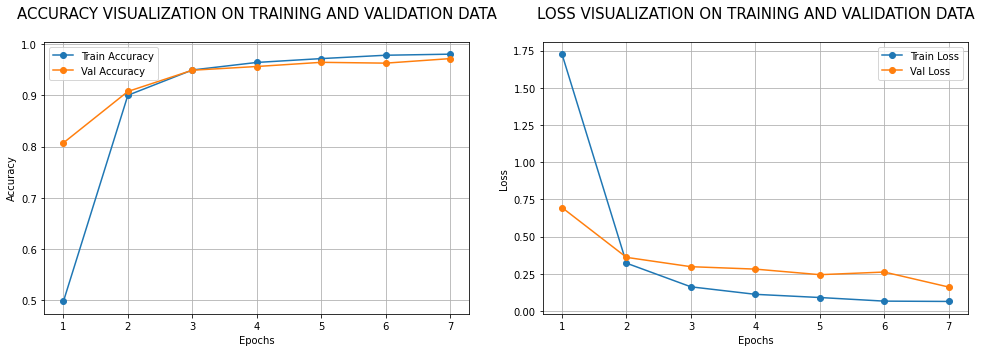

In [50]:
plt.figure(figsize=(14,5))     # setting size of figure

# first_model

plt.subplot(1,2,1)

plt.plot(epoch,train_acc, label='Train Accuracy', marker='o')
plt.plot(epoch,val_acc, label='Val Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("ACCURACY VISUALIZATION ON TRAINING AND VALIDATION DATA\n", size=15)
plt.legend()
plt.grid()
plt.tight_layout()



plt.subplot(1,2,2)

plt.plot(epoch,train_loss, label='Train Loss', marker='o')
plt.plot(epoch,val_loss, label='Val Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("LOSS VISUALIZATION ON TRAINING AND VALIDATION DATA\n", size=15)
plt.grid()


### **Checking Accuracy and Loss on test data (Unseen data)**

In [51]:
final_loss , final_accuracy = model.evaluate(x = test_X , y = test_y)

395/395 [==============================] - 1s 4ms/step - loss: 0.2545 - accuracy: 0.9515


In [52]:
print(f'Loss on test data is: {final_loss * 100} %')
print(f'Accuracy on test data is: {final_accuracy * 100} %')

Loss on test data is: 25.45049786567688 %
Accuracy on test data is: 95.14647722244263 %


### **Predicting from Model**

In [53]:
random_img_num = np.random.randint(0, len(test_X) + 1)

test_img = test_X[random_img_num]

print(f"Image number is: {random_img_num}")

pred = model.predict(np.expand_dims(test_img, axis = 0))

Image number is: 212


In [54]:
pred

array([[2.3376038e-27, 1.5709755e-18, 8.7195295e-23, 7.9323451e-24,
        3.4930221e-29, 2.2209125e-19, 9.0638645e-31, 1.1492737e-14,
        3.1465051e-25, 4.8994528e-36, 1.0744478e-32, 9.3804562e-15,
        6.6022801e-26, 1.6819741e-26, 6.1164419e-25, 2.5259551e-25,
        1.0347800e-27, 6.9712347e-36, 5.4146498e-18, 2.6295866e-24,
        8.1316508e-23, 1.2295320e-13, 1.7723662e-22, 8.0159667e-24,
        9.3542372e-13, 1.0000000e+00, 2.6098450e-20, 2.2340475e-13,
        3.1798216e-17, 3.8972472e-17, 2.4915896e-17, 1.0007595e-15,
        4.6672475e-22, 4.5548002e-23, 3.2344780e-35, 3.6777708e-23,
        2.8237308e-38, 2.1107618e-27, 2.7185647e-28, 6.3233119e-28,
        2.9866834e-27, 2.7759169e-37, 4.4871441e-31]], dtype=float32)

In [55]:
pred.max()        # maximum accuracy 

1.0

In [56]:
pred.argmax()      # index number of maximum accuracy

25

**Model predict that image at index number `4396` belongs to `2` class, Now we have to check that whether model predict right or wrong**

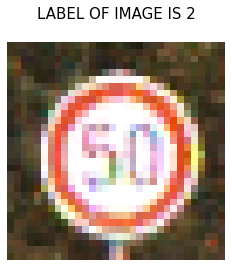

In [57]:
plt.imshow(test_X[4396])
plt.title(f"LABEL OF IMAGE IS {np.argmax(test_y[4396])}\n", size = 15)
plt.axis('off')

plt.show()

**So our model predict right**

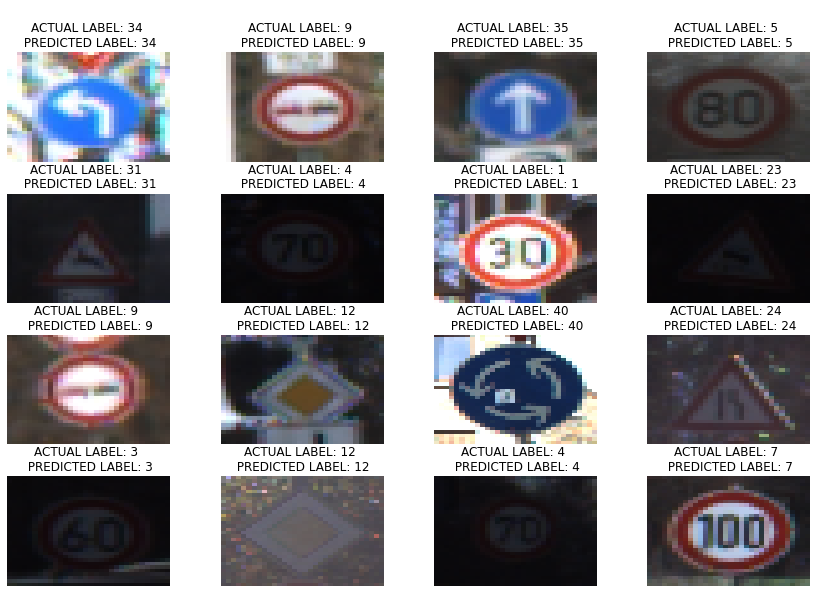

In [58]:
fig, axes = plt.subplots(4,4, figsize=(12,8))
fig.tight_layout()

for i in range(4):
  for j in range(4):
    rand_num = np.random.randint(0, len(test_X)+1)
    img = test_X[rand_num]      # image at specific index
    label = test_y[rand_num]

    # predicting image after expanding dimension (from 3d to 4d)
    pred = model.predict(np.expand_dims(img, axis = 0))   

    axes[i][j].imshow(img, aspect='auto')
    axes[i][j].set_title(f"\nACTUAL LABEL: {np.argmax(label)} \n PREDICTED LABEL: {pred.argmax()}")

    axes[i][j].axis('off')


### **Predicting all test images and Visualizing result with heatmap**

In [59]:
all_prediction = model.predict(test_X)         # prediction on all test data

### **Checking for predicted labels**

In [60]:
predicted_labels = [np.argmax(pred) for pred in all_prediction]

In [61]:
predicted_labels[:20]     # displaying first 20 predicted labels

[16, 1, 38, 33, 11, 38, 18, 12, 25, 35, 12, 7, 23, 7, 4, 9, 21, 20, 27, 38]

### **Checking for actual labels**

In [62]:
test_y[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

**Converting labels into normal form**

In [63]:
test_y = [np.argmax(i) for i in test_y]

In [64]:
test_y[:20]               # displaying first 20 actual labels

[16, 1, 38, 33, 11, 38, 18, 12, 25, 35, 12, 7, 23, 7, 4, 9, 21, 20, 27, 38]

### **Creating confusion matrix**

In [65]:
from tensorflow.math import confusion_matrix

In [66]:
cm = confusion_matrix(labels = test_y , predictions = predicted_labels)

In [67]:
cm

<tf.Tensor: shape=(43, 43), dtype=int32, numpy=
array([[ 60,   0,   0, ...,   0,   0,   0],
       [  1, 713,   0, ...,   0,   0,   0],
       [  0,  17, 708, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  83,   0,   0],
       [  0,   0,   0, ...,   0,  52,   0],
       [  0,   0,   0, ...,   0,   8,  81]], dtype=int32)>

### **Visualizing using Seaborn**

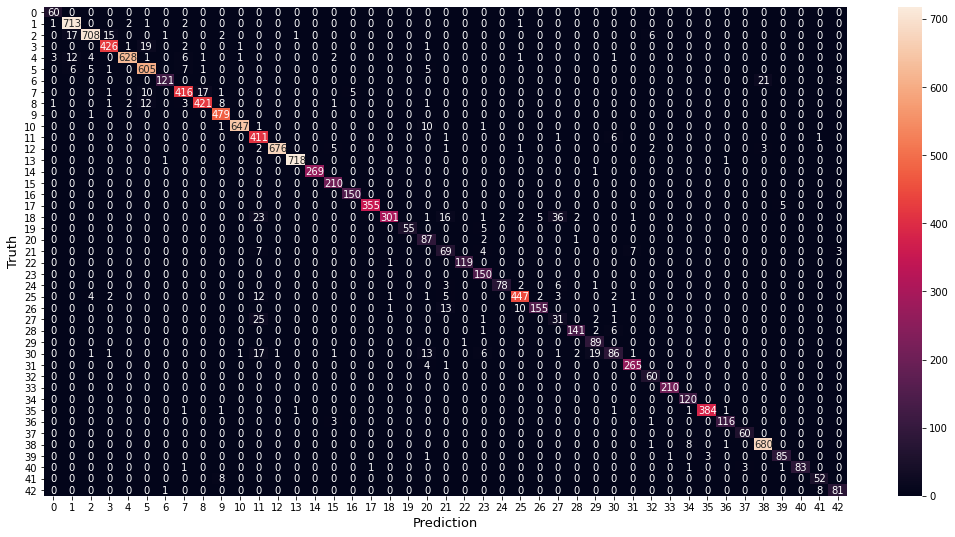

In [68]:
plt.figure(figsize = (18,9))
sbn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel("Prediction", size=13)
plt.ylabel("Truth",  size=13)
plt.show()

---

## **Predicting model on real data**

**Importing image**

In [69]:
from google.colab import files
files.upload()

Saving stop_sign.jpeg to stop_sign.jpeg


{'stop_sign.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\n\x06\x08\x13\x15\x13\x17\x13\x13\x13\x18\x18\x17\x18\x1b\x1a\x1b\x1a\x1a\x1a\x19\x1c\x1f\x1f\x1a\x1a\x1d\x1f\x1a\x1a#\x1a\x1f!\x1a!+#\x1d!*!\x1c\x19$5%*,.222\x1d!7<71;+12.\x01\x0b\x0b\x0b\x0f\x0e\x0f\x1d\x11\x11\x1d4(#)441;.613112131111131411111319111131111111113111111\xff\xc0\x00\x11\x08\x00\xb8\x01\x12\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x01\x03\x05\x06\x02\x07\xff\xc4\x00E\x10\x00\x02\x01\x03\x03\x02\x04\x03\x04\x07\x04\t\x04\x03\x01\x00\x01\x02\x11\x00\x03!\x04\x121\x05A\x13"Qa\x06q\x812B\x91\xa1\x07#R\xb1\xc1\xd1\xf0\x14\x15$\xe1CSbcr\x82\x92\xb2\xf13s\xa2\xd24d\xa3\x16\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\xff\xc4\x003\x11\x00\x02\x02\x01\x04\x01\x02\x05\x02\x05\x03\x05\x00\x00\x00\x00\x01\x02\x00\x11\x03\x

In [70]:
img_path = '/content/stop_sign.jpeg'

In [71]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [72]:
img = load_img(img_path, target_size = (32,32,3))

### **Preprocess image**

In [73]:
def normalize(img):
  return img / 255.0

In [74]:
def preprocess(img):
  img = img_to_array(img)
  
  normalized_img = normalize(img)

  final_img = np.expand_dims(normalized_img, axis=0)      

  return final_img

In [75]:
# img = img_to_array(img)

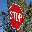

In [76]:
img

In [77]:
img = preprocess(img)

In [78]:
pred = model.predict(img)
pred

array([[1.2387109e-19, 1.0883964e-15, 5.2737467e-18, 3.0791580e-16,
        4.1531995e-20, 1.4753933e-13, 2.0632230e-31, 8.6941516e-16,
        2.0899808e-17, 3.9273381e-15, 1.2762495e-10, 3.2436720e-27,
        4.5823904e-11, 1.7751510e-14, 1.0000000e+00, 2.3610806e-15,
        6.3943033e-23, 3.1905126e-14, 7.7635636e-24, 5.0031131e-25,
        5.6263541e-17, 5.1202092e-20, 8.8384703e-18, 1.1558917e-20,
        2.1544383e-27, 1.6645882e-13, 2.7793752e-19, 1.3219967e-32,
        4.8421642e-23, 2.3889819e-14, 2.5850661e-26, 3.7099357e-18,
        1.2238078e-19, 2.2485057e-35, 1.7669265e-28, 8.3140331e-26,
        1.6014442e-29, 9.0940653e-31, 5.2370292e-22, 8.1507371e-26,
        6.7869885e-25, 2.1730737e-29, 4.1487751e-23]], dtype=float32)

In [79]:
pred.argmax()

14

#### **Model predict that given image belong to 14 class So checking for classes**

In [80]:
import pandas as pd

In [81]:
file_path = '/content/german-traffic-signs/signnames.csv'

sign_names = pd.read_csv(file_path)

In [82]:
sign_names

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


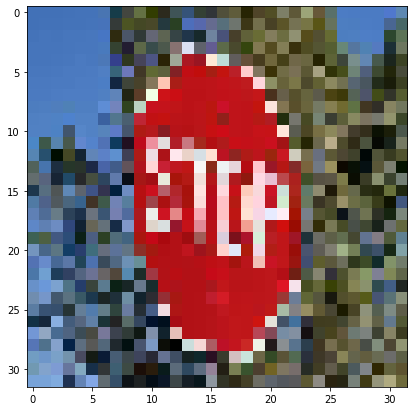

In [83]:
plt.figure(figsize = (9,7))
plt.imshow(img.reshape(32,32,3))
plt.show()

### **Sign Name of `14 class` is *`Stop`* So model predict right**

### **Predicting on another image**

In [84]:
from google.colab import files
files.upload()

Saving children_crossing.jpeg to children_crossing.jpeg


{'children_crossing.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x12\x12\x12\x15\x15\x15\x17\x17\x19\x17\x15\x15\x18\x18\x17\x1d\x1a\x16\x18\x18\x17\x17\x18\x18\x18\x18\x18\x18\x1f( \x18\x1d%\x1d\x18\x1d!1!%)+...\x18\x1f383-7*-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1a-% %------1-------//-----+-----/----/-----------------\xff\xc0\x00\x11\x08\x00\xc0\x01\x06\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x05\x06\x04\x07\x08\xff\xc4\x00G\x10\x00\x02\x01\x02\x04\x03\x06\x03\x06\x02\x07\x06\x05\x05\x00\x00\x01\x02\x11\x00\x03\x04\x12!1\x05AQ\x06\x13"aq\x812\x91\xa1\x07B\xb1\xc1\xd1\xf0\x14R\x16#3br\x82\x92\x15C\x93\xb2\xc2\xe1$Ds\xe3\xf1%Sc\x83\xb3\xff\xc4\x00\x1a\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x000\x11\x00\x02\x01\x02\x05\x02\x04\x05\x04\x03\x01\x00\x00\x

In [85]:
image = load_img('/content/children_crossing.jpeg', target_size=(32,32,3))

In [86]:
image = preprocess(image)

In [87]:
p = model.predict(image)
p

array([[2.38431779e-12, 8.55891136e-10, 6.20600904e-10, 2.51365684e-09,
        1.26787214e-09, 5.57173863e-10, 6.36776587e-09, 3.46110224e-10,
        1.96844263e-10, 1.87729654e-08, 3.56108058e-06, 3.08539402e-02,
        1.11086510e-01, 9.51228358e-08, 4.36799397e-04, 1.17588411e-06,
        8.81197060e-11, 4.63531435e-01, 7.31357886e-07, 8.84395104e-06,
        4.35644127e-02, 1.39892881e-03, 4.32915961e-08, 1.05307809e-04,
        9.12665087e-07, 4.35062839e-06, 3.02450359e-01, 2.49154604e-04,
        2.68509891e-02, 4.83214644e-05, 1.93969924e-02, 9.02879151e-07,
        1.13803274e-07, 7.29807215e-10, 6.29829344e-07, 1.54877711e-07,
        3.07711332e-07, 4.89800978e-11, 1.29307284e-06, 3.28571281e-09,
        3.18106347e-10, 2.24883865e-06, 1.47198443e-06]], dtype=float32)

In [88]:
p.argmax()

17

**Model predict that image is of 28 class, Now check that whether model predict right or not**

In [89]:
sign_names[sign_names['ClassId'] == 28]

,ClassId,SignName
28,28,Children crossing


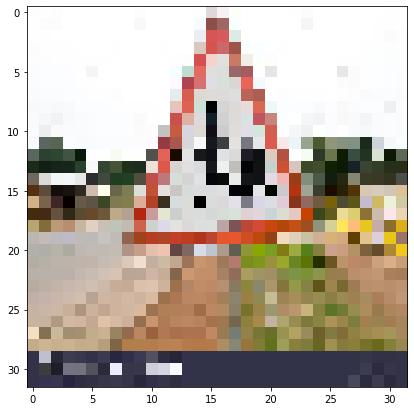

In [90]:
plt.figure(figsize = (9,7))
plt.imshow(image.reshape(32,32,3))
plt.show()

### **Sign name of image is `Children crossing` so model predict right**

---

### **Saving model**

In [91]:
model.save('Traffic_sign_classifier.h5')